In [160]:
import warnings
warnings.filterwarnings(action='ignore')

### Part1. DBMS의 기본키와 외래키의 간단 실습

In [38]:
# 아래와 같이 DB를 구축하면 삽입, 삭제, 갱신 이상이 생길수 있음.
import pandas as pd
df=pd.DataFrame({'id':[1,2,1,2,1,1,1,2,3,1],
                 'id_gender':['F','M','F','M','F','F','F','M','M','F'],
                 'id_age':[25,45,25,45,25,25,25,45,32,25],
             'pumMok':['pen','book','pen','pen','pen','book','pen','book','brush','brush'],
             'count':[5,1,3,1,3,2,1,1,3,1],
              'danga':[2000,10000,2000,2000,2000,1000,2000,1000,1500,1500]})
df

,id,id_gender,id_age,pumMok,count,danga
0,1,F,25,pen,5,2000
1,2,M,45,book,1,10000
2,1,F,25,pen,3,2000
3,2,M,45,pen,1,2000
4,1,F,25,pen,3,2000
5,1,F,25,book,2,1000
6,1,F,25,pen,1,2000
7,2,M,45,book,1,1000
8,3,M,32,brush,3,1500
9,1,F,25,brush,1,1500


In [21]:
customerDB=pd.DataFrame({'id':[1,2,3],
                        'age':[25,45,32],
                        'gender':['F','M','F'],
                        'grade':['A+','B+','A+']})
customerDB

,id,age,gender,grade
0,1,25,F,A+
1,2,45,M,B+
2,3,32,F,A+


In [19]:
discountDb=pd.DataFrame({'grade':['A','A+','B','B+'],
                     'discount_rate':[0.3,0.4,0.1,0.3]})
discountDb

,grade,discount_rate
0,A,0.3
1,A+,0.4
2,B,0.1
3,B+,0.3


In [26]:
# 일대다 또는 다대일 관계: 고객정보의 grade 값에 따라 할인율 정보를 갖고옴
df=pd.merge(customerDB,discountDb, on='grade', how='left')
df

,id,age,gender,grade,discount_rate
0,1,25,F,A+,0.4
1,2,45,M,B+,0.3
2,3,32,F,A+,0.4


In [28]:
pumMokDB=pd.DataFrame({'pumid':[10,20,30,40],
                      'pumMokNmae':['book','ball','pen','brush'],
                      'Danga':[1000,240,2000,1500]})
pumMokDB

,pumid,pumMokNmae,Danga
0,10,book,1000
1,20,ball,240
2,30,pen,2000
3,40,brush,1500


In [32]:
# 다대다 관계에서의 새로운 테이블 생성
pan=pd.DataFrame({'id':[1,2,1,1,1,2,1,1],
                'pumid':[10,10,20,10,20,10,40,20],
                'cnt':[5,1,2,1,2,1,1,2]})
pan

,id,pumid,cnt
0,1,10,5
1,2,10,1
2,1,20,2
3,1,10,1
4,1,20,2
5,2,10,1
6,1,40,1
7,1,20,2


In [36]:
### 생성된 다대다 관계는 merge 하여 
## 모든 테이블을 연결함.
## 다대다 관계의 판매데이터를 
## 고객데이터(df:  고객데이터+할인율)와 연결
df1=pd.merge(pan,df,on='id', how='left')
df1

,id,pumid,cnt,age,gender,grade,discount_rate
0,1,10,5,25,F,A+,0.4
1,2,10,1,45,M,B+,0.3
2,1,20,2,25,F,A+,0.4
3,1,10,1,25,F,A+,0.4
4,1,20,2,25,F,A+,0.4
5,2,10,1,45,M,B+,0.3
6,1,40,1,25,F,A+,0.4
7,1,20,2,25,F,A+,0.4


In [37]:
df1=pd.merge(df1,pumMokDB,on='pumid', how='left')
df1

,id,pumid,cnt,age,gender,grade,discount_rate,pumMokNmae,Danga
0,1,10,5,25,F,A+,0.4,book,1000
1,2,10,1,45,M,B+,0.3,book,1000
2,1,20,2,25,F,A+,0.4,ball,240
3,1,10,1,25,F,A+,0.4,book,1000
4,1,20,2,25,F,A+,0.4,ball,240
5,2,10,1,45,M,B+,0.3,book,1000
6,1,40,1,25,F,A+,0.4,brush,1500
7,1,20,2,25,F,A+,0.4,ball,240


### Part2. movielens 데이터셋의 이해
- 미네소타 대학의 그룹렌즈(FroupLens)프로젝트에 의해 개발된 영화평점(무비렌즈) 데이터셋
- https://grouplens.org/datasets/movielens/
- http://aispiration.com/text/nlp-text-movielens.html

In [57]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [133]:
# Google colab: 데이터 경로 설정
path = 'c:\\data\\ml-latest-small\\'
os.listdir(path)
ratings_df=pd.read_csv(path + 'ratings.csv')
tags_df=pd.read_csv(path + 'tags.csv')
movies_df=pd.read_csv(path + 'movies.csv')


In [43]:
print(ratings_df.shape)
print(ratings_df.head())

(100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [44]:
print(tags_df.shape)
print(tags_df.head())

(3683, 4)
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


In [45]:
print(movies_df.shape)
print(movies_df.head())

(9742, 3)
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


### Part2-1. 평점 데이터의 기초 통계량

In [46]:
n_unique_users = len(ratings_df['userId'].unique())
print(n_unique_users)

610


In [47]:
n_unique_movies = len(ratings_df['movieId'].unique())
print(n_unique_movies)

9724


In [48]:
print('평점의 평균: ', ratings_df['rating'].mean())
print('평점의 표준편차: ', ratings_df['rating'].std())

평점의 평균:  3.501556983616962
평점의 표준편차:  1.042529239060635


In [49]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [50]:
# nan 값이 있는지 확인
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

array([[<AxesSubplot:title={'center':'userId'}>,
        <AxesSubplot:title={'center':'movieId'}>],
       [<AxesSubplot:title={'center':'rating'}>, <AxesSubplot:>]],
      dtype=object)

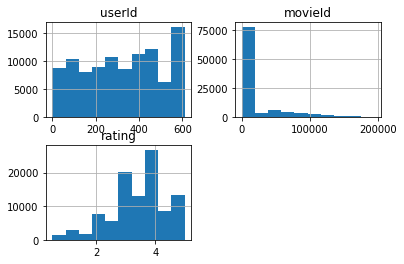

In [51]:
ratings_df[['userId','movieId','rating']].hist()

In [52]:
ratings_df.groupby(['userId', 'rating']).size()

userId  rating
1       1.0         1
        2.0         5
        3.0        26
        4.0        76
        5.0       124
                 ... 
610     3.0       230
        3.5       315
        4.0       286
        4.5       148
        5.0       180
Length: 3976, dtype: int64

In [53]:
ratings_df.groupby(['userId']).mean()

,movieId,rating,timestamp
userId,,,
1,1854.603448,4.366379,9.649856e+08
2,70350.275862,3.948276,1.445715e+09
3,7058.384615,2.435897,1.306464e+09
4,1982.129630,3.555556,9.658643e+08
5,343.840909,3.636364,8.474351e+08
...,...,...,...
606,9692.197309,3.657399,1.179512e+09
607,1860.636364,3.786096,9.647841e+08
608,4502.605295,3.134176,1.122668e+09


In [54]:
userid_rating_df = pd.DataFrame({'count': ratings_df.groupby(['userId', 'rating']).size()})
userid_rating_df = userid_rating_df.reset_index()
userid_rating_df.head(10)

,userId,rating,count
0,1,1.0,1
1,1,2.0,5
2,1,3.0,26
3,1,4.0,76
4,1,5.0,124
5,2,2.0,1
6,2,2.5,1
7,2,3.0,4
8,2,3.5,4
9,2,4.0,9


In [56]:
user_info = ratings_df.groupby('userId')['movieId'].count()
user_info.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

C:\Users\BSS\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

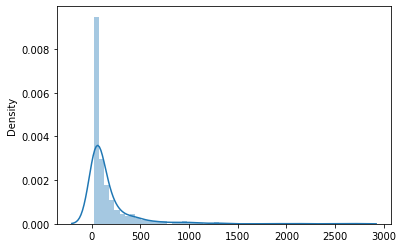

In [58]:
# user가 몇개의 영화에 대해서 rating을 했는지를 볼 수 있는 분포(그래프)
sns.distplot(user_info.values)

### Part2-2. user가 평균적으로 준 평점과 평점을 준 영화의 수

In [59]:
stats_df = pd.DataFrame({
    'movie_count': ratings_df.groupby('userId')['movieId'].count(),
    'rating_avg': ratings_df.groupby('userId')['rating'].mean(), 
'rating_std': ratings_df.groupby('userId')['rating'].std()})

print(stats_df.shape)
print(stats_df.head())

(610, 3)
        movie_count  rating_avg  rating_std
userId                                     
1               232    4.366379    0.800048
2                29    3.948276    0.805615
3                39    2.435897    2.090642
4               216    3.555556    1.314204
5                44    3.636364    0.990441


### Part2-3. rating이 많은 영화


In [60]:
movieid_user_df = pd.DataFrame({
    'num_users_watch': ratings_df.groupby('movieId')['userId'].count(),
    'avg_ratings': ratings_df.groupby('movieId')['rating'].mean(),
    'std_ratings': ratings_df.groupby('movieId')['rating'].std()
})
movieid_user_df = movieid_user_df.reset_index()
print(movieid_user_df.shape)
print(movieid_user_df.head(10))

(9724, 4)
   movieId  num_users_watch  avg_ratings  std_ratings
0        1              215     3.920930     0.834859
1        2              110     3.431818     0.881713
2        3               52     3.259615     1.054823
3        4                7     2.357143     0.852168
4        5               49     3.071429     0.907148
5        6              102     3.946078     0.817224
6        7               54     3.185185     0.977561
7        8                8     2.875000     1.125992
8        9               16     3.125000     0.974679
9       10              132     3.496212     0.859381


In [61]:
movieid_user_df.sort_values(by='num_users_watch', ascending=False)

,movieId,num_users_watch,avg_ratings,std_ratings
314,356,329,4.164134,0.831244
277,318,317,4.429022,0.713019
257,296,307,4.197068,0.951997
510,593,279,4.161290,0.853983
1938,2571,278,4.192446,0.975243
...,...,...,...,...
3053,4093,1,1.500000,NaN
3049,4089,1,2.000000,NaN
6687,58351,1,4.000000,NaN
3045,4083,1,4.000000,NaN


<AxesSubplot:>

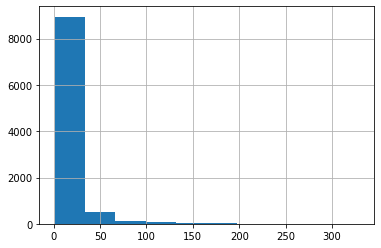

In [62]:
# long tail economy
movieid_user_df['num_users_watch'].hist()

In [63]:
# 1번 또는 1명만 평점을 준 영화
movieid_user_df['movieId'][movieid_user_df.num_users_watch == 1].count()

3446

In [64]:
# 3번 미만의 영화
movieid_user_df['movieId'][movieid_user_df.num_users_watch < 3].count()

4744

### Part2-4. 평점이 높은 영화(장르), 평점을 많이 받은 영화(장르)

In [65]:
# 영화 정보를 활용
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [66]:
# 평점을 많이 받은 영화 
ratings_count_df = ratings_df.groupby('movieId')['userId'].count()
ratings_count_df.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [98]:
df = pd.DataFrame({
    'ratings_count': ratings_df.groupby('movieId')['userId'].count(),
})

df.tail()

,ratings_count
movieId,
193581,1
193583,1
193585,1
193587,1
193609,1


In [107]:
df1=pd.merge(df,movies_df[['movieId','title']],on='movieId',how='left')
print(df1.isna().sum())
df1.head()

movieId          0
ratings_count    0
title            0
dtype: int64


,movieId,ratings_count,title
0,1,215,Toy Story (1995)
1,2,110,Jumanji (1995)
2,3,52,Grumpier Old Men (1995)
3,4,7,Waiting to Exhale (1995)
4,5,49,Father of the Bride Part II (1995)


In [105]:
df1.sort_values(by='ratings_count', ascending=False)

,movieId,ratings_count,title
314,356,329,Forrest Gump (1994)
277,318,317,"Shawshank Redemption, The (1994)"
257,296,307,Pulp Fiction (1994)
510,593,279,"Silence of the Lambs, The (1991)"
1938,2571,278,"Matrix, The (1999)"
...,...,...,...
3053,4093,1,Cop (1988)
3049,4089,1,Born in East L.A. (1987)
6687,58351,1,City of Men (Cidade dos Homens) (2007)
3045,4083,1,Best Seller (1987)


### Part2-5. 특정 영화의 평점 분포
movieId : 356, Forrest Gump(1994)
movieId : 2571, Matrix, The (1999)

<AxesSubplot:>

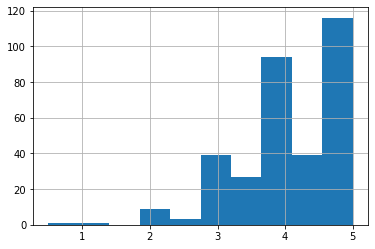

In [108]:
ratings_df[ratings_df.movieId == 356]['rating'].hist()


<AxesSubplot:>

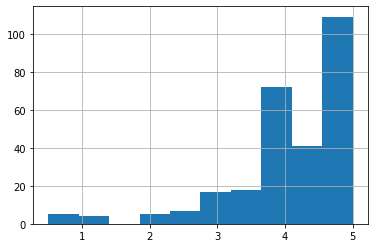

In [109]:
ratings_df[ratings_df.movieId == 2571]['rating'].hist()


### Part2-6. 특정 유저가 주는 평점과 실제 영화에 대한 평점 분포가 비슷할까?

In [110]:
ratings_df[(ratings_df.movieId == 356) & (ratings_df.rating < 2)]


,userId,movieId,rating,timestamp
12274,76,356,1.0,1439165536
13553,89,356,0.5,1520408275


In [111]:
ratings_df[(ratings_df.movieId == 2571) & (ratings_df.rating < 2)]


,userId,movieId,rating,timestamp
442,4,2571,1.0,945173385
1130,10,2571,0.5,1455356378
8706,59,2571,1.0,953609098
12239,75,2571,1.0,1158967564
17337,111,2571,0.5,1516140656
22474,153,2571,0.5,1525548255
65107,416,2571,1.0,1187496634
71534,461,2571,0.5,1505935248
71706,462,2571,0.5,1154037742


<AxesSubplot:>

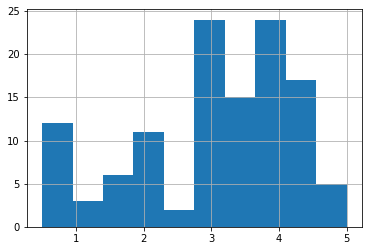

In [112]:
ratings_df[ratings_df.userId == 76]['rating'].hist()


### Part2-7. 장르파악

In [121]:
movies_df.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
### get_dummies 활용
genres_df = movies_df['genres'].str.get_dummies(sep='|')
genres_df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [135]:
movies_df = pd.concat([movies_df, genres_df], axis=1)
movies_df.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# 특정 장르의 평점과 user 분석
movies_df.columns

Index(['movieId', 'title', 'genres', '(no genres listed)', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [137]:
movies_df['Animation']

0       1
1       0
2       0
3       0
4       0
       ..
9737    1
9738    1
9739    0
9740    1
9741    0
Name: Animation, Length: 9742, dtype: int64

In [142]:
movieId_list=movies_df['title'][movies_df.Animation == 1]
movieId_list.index

Int64Index([   0,   12,   44,  205,  272,  322,  483,  488,  506,  511,
            ...
            9667, 9683, 9708, 9729, 9732, 9733, 9735, 9737, 9738, 9740],
           dtype='int64', length=611)

In [145]:
animation_df = ratings_df[ratings_df['movieId'].isin(movieId_list.index)]
animation_df.head()

,userId,movieId,rating,timestamp
28,1,527,5.0,964984002
35,1,596,5.0,964982838
39,1,673,3.0,964981775
42,1,780,3.0,964984086
98,1,1517,5.0,964981107


In [146]:
# user는 animation장르의 영화에 대해 다음과 같은 평점을 부여
animation_df.groupby('userId')['rating'].mean()

userId
1      4.400000
3      2.500000
4      2.200000
5      4.333333
6      3.666667
         ...   
606    3.656863
607    4.333333
608    3.092105
609    3.000000
610    3.795455
Name: rating, Length: 525, dtype: float64

In [150]:
## 장르간 상관관계
genres_df.corr()


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


<AxesSubplot:>

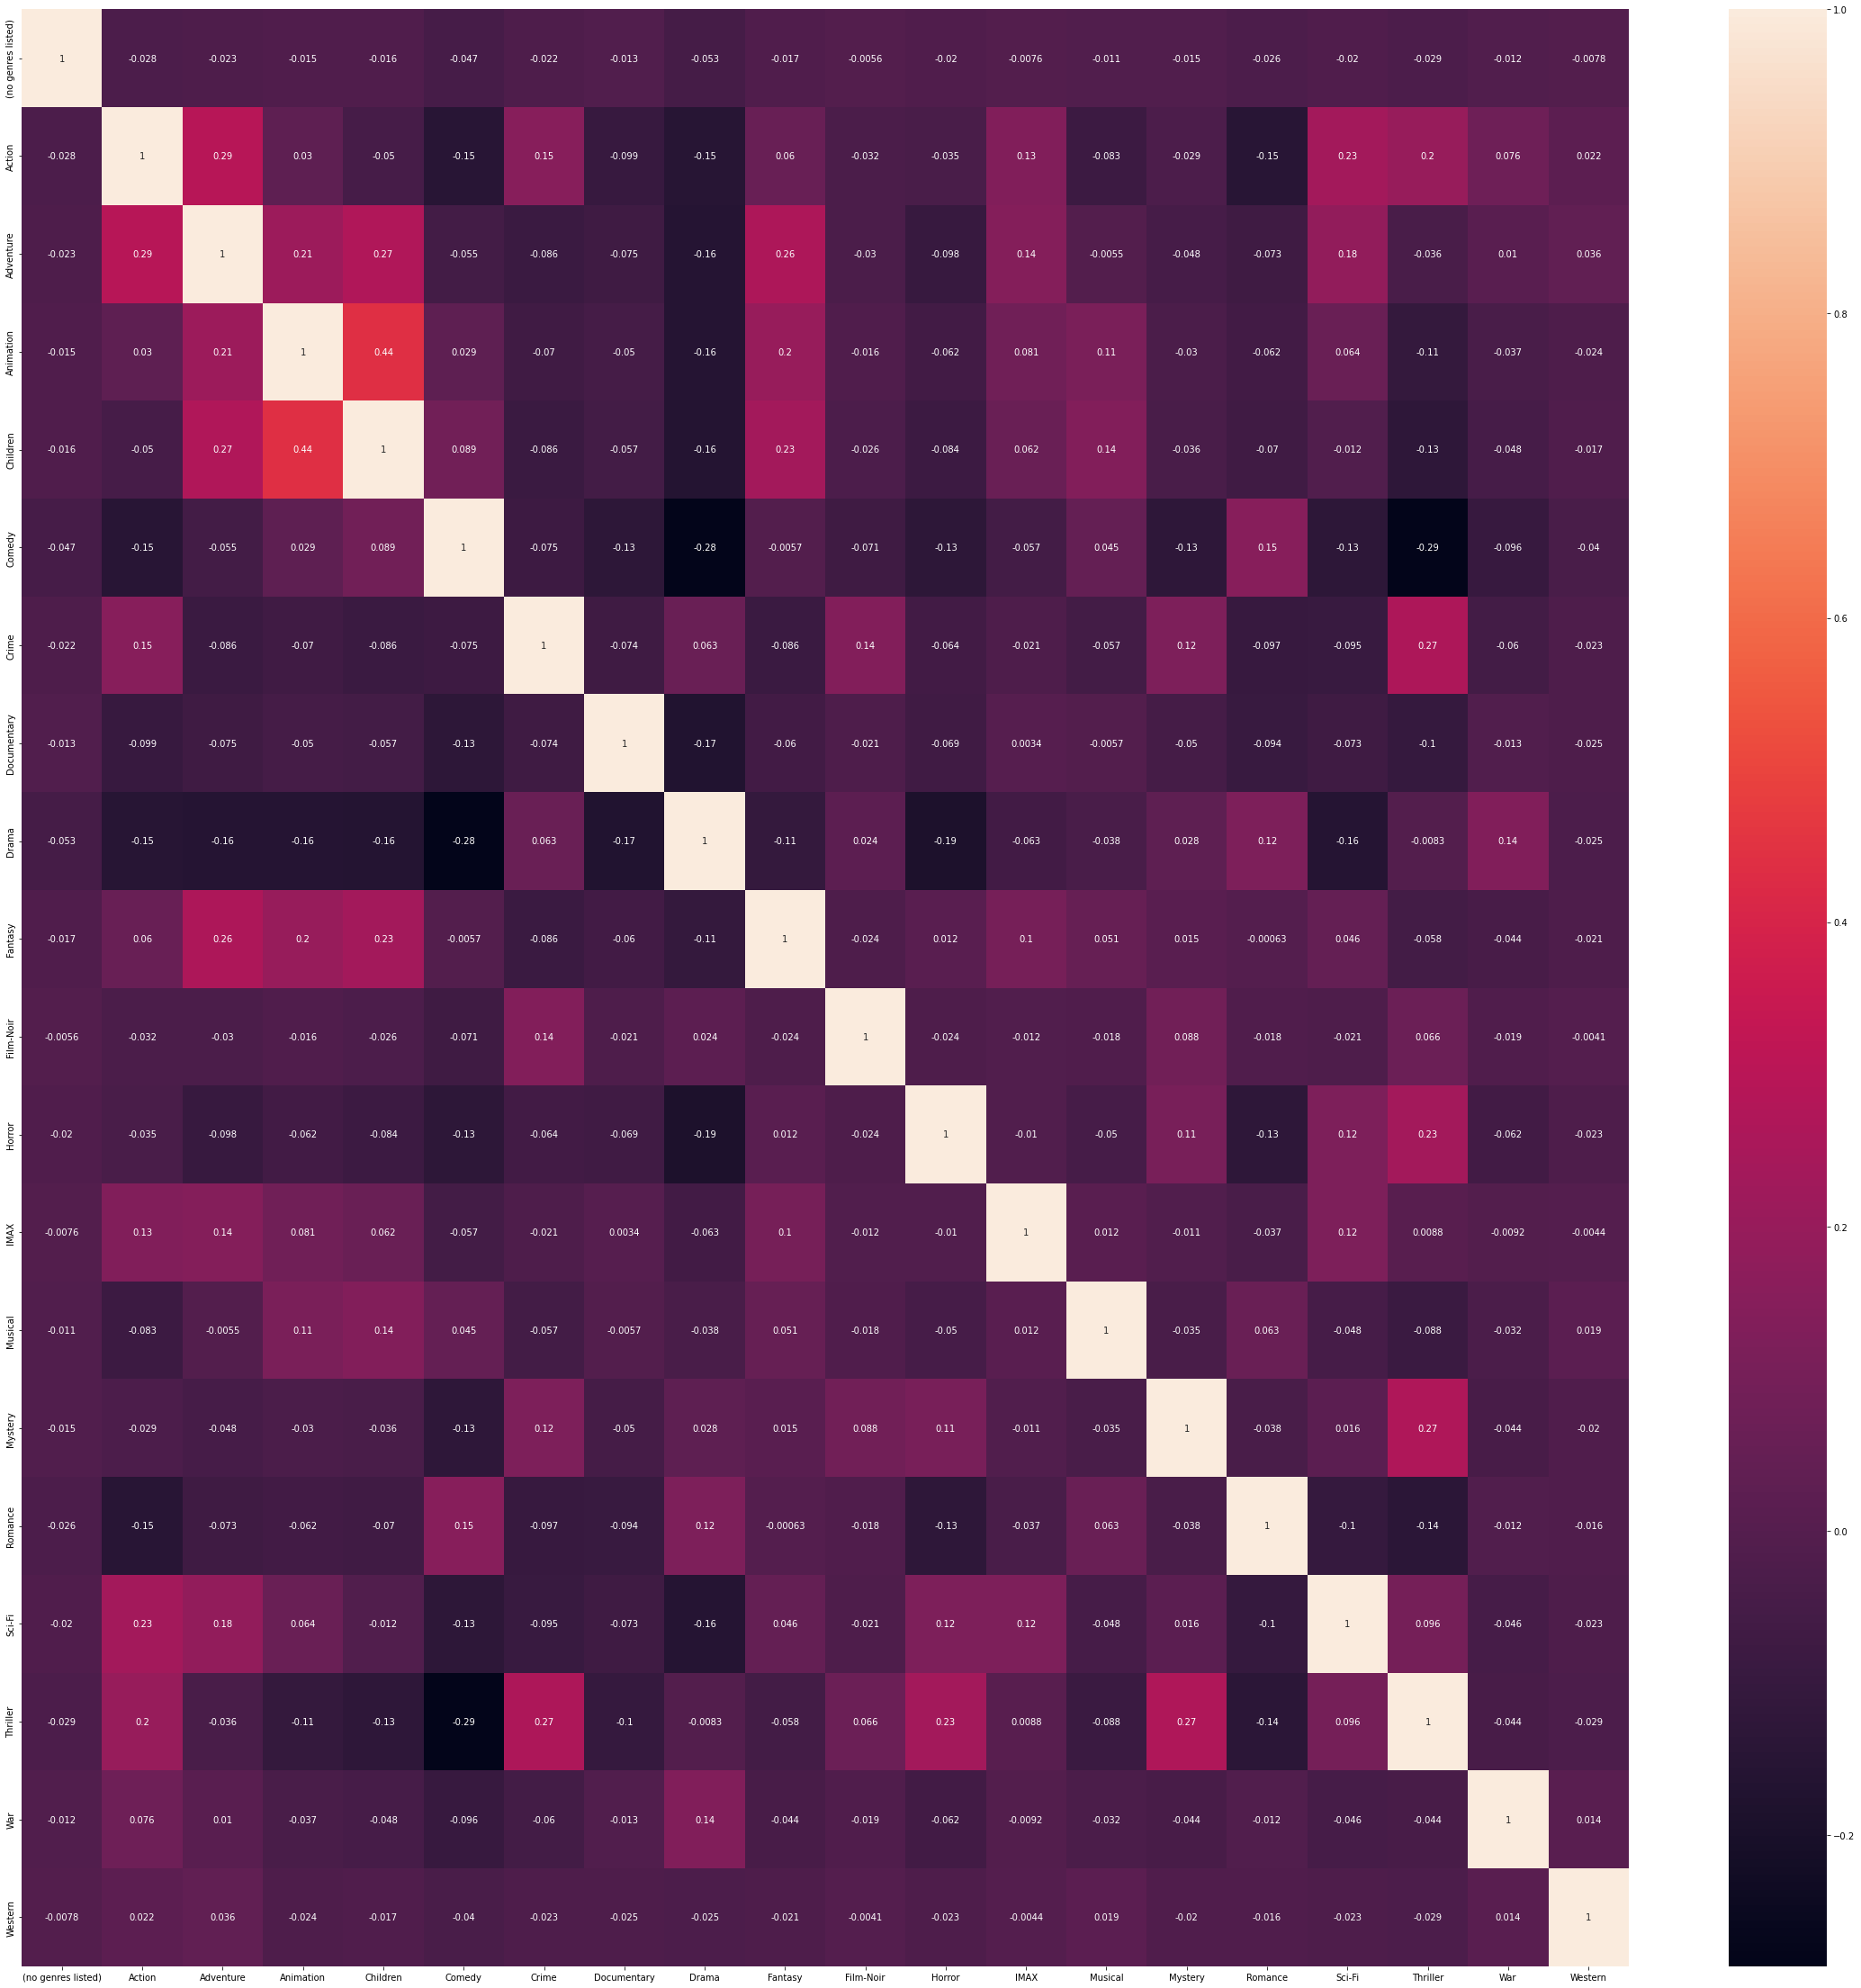

In [149]:
plt.figure(figsize=(40,40))
sns.heatmap(genres_df.corr(), annot=True)

In [151]:
## 영화 이름, 연도 분석
movies_df.head()


,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
title_df = movies_df[['title', 'genres']]
title_df.head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [162]:
title_df['year'] = title_df['title'].str.extract('(\(\d\d\d\d\))')
title_df.head()

,title,genres,year
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
1,Jumanji (1995),Adventure|Children|Fantasy,(1995)
2,Grumpier Old Men (1995),Comedy|Romance,(1995)
3,Waiting to Exhale (1995),Comedy|Drama|Romance,(1995)
4,Father of the Bride Part II (1995),Comedy,(1995)


In [163]:
title_df.isna().sum()

title      0
genres     0
year      13
dtype: int64

In [164]:
title_df[title_df['year'].isnull()]


,title,genres,year
6059,Babylon 5,Sci-Fi,NaN
9031,Ready Player One,Action|Sci-Fi|Thriller,NaN
9091,Hyena Road,(no genres listed),NaN
9138,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
9179,Nocturnal Animals,Drama|Thriller,NaN
9259,Paterson,(no genres listed),NaN
9367,Moonlight,Drama,NaN
9448,The OA,(no genres listed),NaN
9514,Cosmos,(no genres listed),NaN
9515,Maria Bamford: Old Baby,(no genres listed),NaN


In [165]:
# 연도가 없는 영화 또는 (no genres listed)라고 표시된 영화제거전 확인
title_df[title_df.genres == '(no genres listed)'].shape

(34, 3)

In [174]:
# 연도가 없는 영화 또는 (no genres listed)라고 표시된 영화제거
title_df.dropna(axis=0, inplace=True)


In [175]:
# 년도분리
title_df['year'] = title_df['year'].apply(lambda x: x.replace('(','').replace(')',''))
title_df.head()

,title,genres,year
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,Jumanji (1995),Adventure|Children|Fantasy,1995
2,Grumpier Old Men (1995),Comedy|Romance,1995
3,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,Father of the Bride Part II (1995),Comedy,1995


In [167]:
# 연도별 영화 데이터 분석
year_freq_df = title_df.groupby('year')['title'].count()
year_freq_df

year
1902      1
1903      1
1908      1
1915      1
1916      4
       ... 
2014    278
2015    274
2016    218
2017    147
2018     41
Name: title, Length: 106, dtype: int64

In [168]:
year_freq_df.sort_values(ascending=False)


year
2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1919      1
1917      1
1915      1
1908      1
1902      1
Name: title, Length: 106, dtype: int64

In [169]:
year_freq_df.describe()


count    106.000000
mean      91.783019
std      102.227757
min        1.000000
25%       16.000000
50%       39.500000
75%      151.500000
max      311.000000
Name: title, dtype: float64

In [170]:
## 영화와 개봉연도, 그리고 평점
movies_df.head()


,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
title_df.head()

,title,genres,year
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,Jumanji (1995),Adventure|Children|Fantasy,1995
2,Grumpier Old Men (1995),Comedy|Romance,1995
3,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,Father of the Bride Part II (1995),Comedy,1995


In [176]:
title_df[title_df['year'] == '2017']


,title,genres,year
8687,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2017
8688,Justice League (2017),Action|Adventure|Sci-Fi,2017
8692,Black Panther (2017),Action|Adventure|Sci-Fi,2017
8694,Thor: Ragnarok (2017),Action|Adventure|Sci-Fi,2017
8695,Guardians of the Galaxy 2 (2017),Action|Adventure|Sci-Fi,2017
...,...,...,...
9728,Liquid Truth (2017),Drama,2017
9731,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,2017
9737,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017


In [177]:
# 2017년 영화 평점 평균
ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year'] == '2017'].index)].mean()

3.0

In [179]:
results = []
for year in title_df['year'].unique():
    avg_ratings = ratings_df['rating'][ratings_df['movieId'].isin(title_df[title_df['year'] == str(year)].index)].mean()
    results.append((year, avg_ratings))

result_df = pd.DataFrame(results, columns=['year','avg_ratings'])
result_df.sort_values(by='year').head()

,year,avg_ratings
91,1902,NaN
92,1903,NaN
105,1908,NaN
84,1915,3.250000
87,1916,3.408451


array([[<AxesSubplot:title={'center':'avg_ratings'}>]], dtype=object)

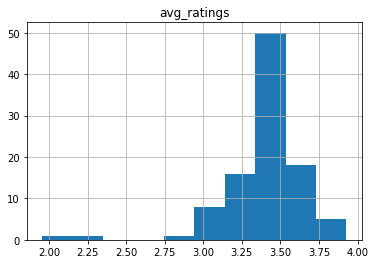

In [180]:
result_df.hist()


### 참고코드
- R에서 의 무비렌즈 데이터셋 처리 
- http://aispiration.com/ml/ml-text-movielens.html